In [2]:
from ThesisFunctions import *

Parameters corresponding to identified minima: [(-3.8483756112373e-16, -1.1453914381593902), (-2.1058597723065, -3.1956779042099837), (1.27972033759579, 0.9411363965650943)]
Number of minima identified: 2
Generated data:    Time      Data
0     0    -21/10
1     1     -3/10
2     2      1/20
3     3  3869/100
4     4  4689/100
5     5     571/4


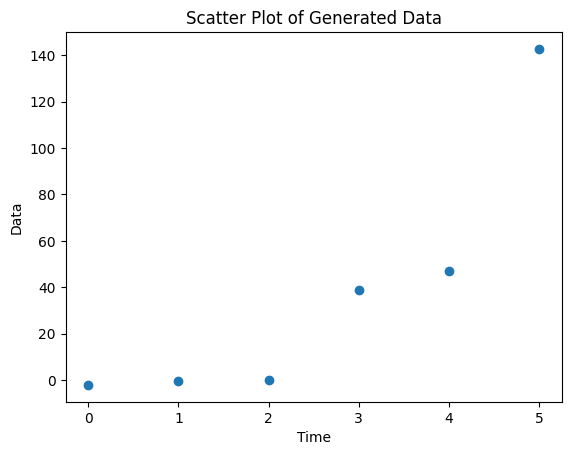

In [29]:
# Set the noise level and number of data points for the experiment.
noise_level = 10
num_data_points = 6

# Initialize symbolic variables for model parameters.
x0, b = sp.symbols('x0 b')

# Variables to store results for use in subsequent analysis.
data = None  # Placeholder for generated data.
params = None  # Placeholder for model parameters.

# Number of minima identified; initialize to ensure entry into the while loop.
num_minimas = 0

# Generate data and analyze until at least two minima are identified.
while num_minimas < 2:
    # Generate synthetic data with specified parameters.
    data = data_gen(num_data_points, noise_level, 1, 1)
    x_i = np.array(data['Data'].values)
    t_i = np.array(data['Time'].values)
    
    # Compute the Groebner basis from the data.
    B = groeb(x_i, t_i)
    
    # Find positive real roots of the system.
    positive_roots_b = roots_symbolic(B[1])
    
    # Determine (x0, alpha) pairs from the roots.
    params = find_x0_alpha_pairs(B, positive_roots_b)
    
    # Evaluate the Hessian at each (x0, alpha) pair to check for minima.
    maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)
    
    # Count the number of confirmed minima.
    num_minimas = sum(1 for _, is_true in maxima_checks if is_true)

# Plot the generated data points for visual inspection.
plt.scatter(t_i, x_i)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Scatter Plot of Generated Data')

# Display the parameters corresponding to identified minima and their count.
print("Parameters corresponding to identified minima:", params)
print("Number of minima identified:", num_minimas)

# Optionally, display the generated data.
print("Generated data:", data)


In [30]:
#Basic Data processing
x_i = list(data['Data'].values)
t_i = list(data['Time'].values)

In [31]:
maxima_checks = evaluate_hessian_at_extremas(params, x_i, t_i)

maxima_checks

[((-3.8483756112373e-16, -1.1453914381593902), False),
 ((-2.1058597723065, -3.1956779042099837), True),
 ((1.27972033759579, 0.9411363965650943), True)]

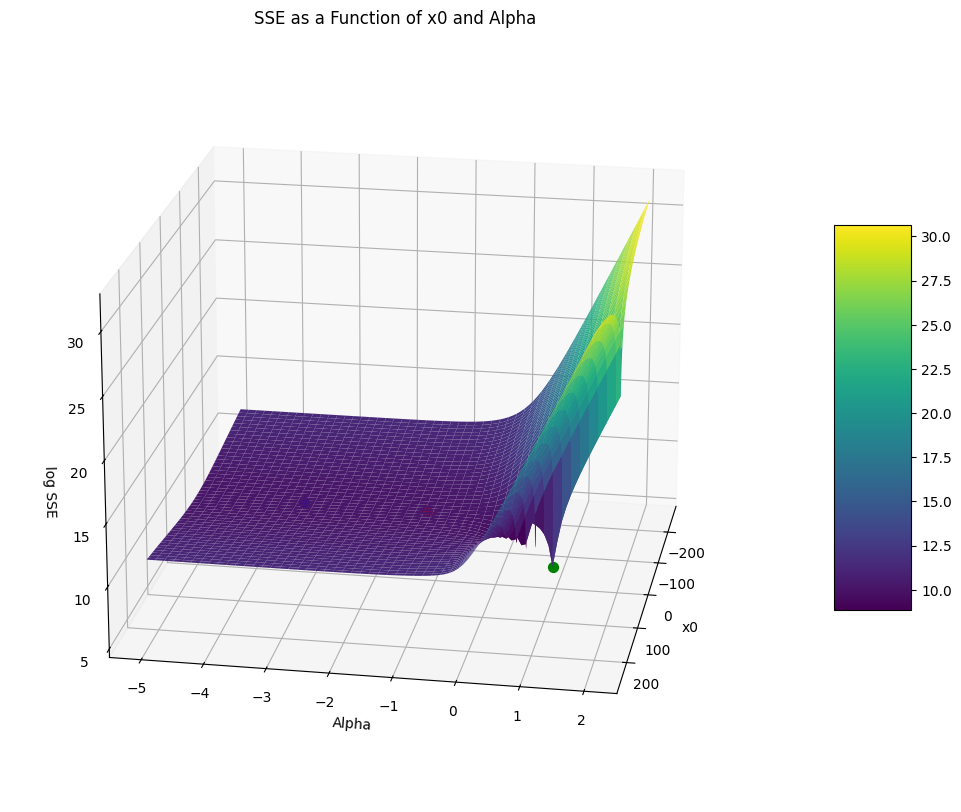

In [39]:
# Define the range for alpha and x0
alpha_range = np.linspace(-5, 2, 100)  # Adjust the range as needed
x0_range = np.linspace(-250, 250, 200)  # Adjust the range as needed


# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)


# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)


# Compute SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params_ = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params_, data)

        
# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


# Surface plot with log scale (since data is exponential)
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')


# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')


p1 = params[0]
p2 = params[1]
p3 = params[2]
#p4 = params[3]


# Corrected Points to include the SSE values for proper 3D plotting
# Calculate the SSE for each point or get it from your previous calculations
p1_sse = np.log(float(sse(p1, data)))
p2_sse = np.log(float(sse(p2, data)))
p3_sse = np.log(float(sse(p3, data)))
#p4_sse = np.log(float(sse(p4, data)))

# Plot points on the surface. Z value needs to be the logged SSE for each point
ax.scatter(p1[0], p1[1], p1_sse, color='red', s=50, label='Point 1')  # s is the size of the point
ax.scatter(p2[0], p2[1], p2_sse, color='blue', s=50, label='Point 2')
ax.scatter(p3[0], p3[1], p3_sse, color='green', s=50, label='minim')
#ax.scatter(p4[0], p4[1], p4_sse, color='yellow', s=50, label='Minima')


# Colorbar to show the SSE scale better/clearer
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.view_init(elev=20, azim=10)

# Show the plot with the adjusted view
plt.show()


In [37]:
print(params)

[(-3.8483756112373e-16, -1.1453914381593902), (-2.1058597723065, -3.1956779042099837), (1.27972033759579, 0.9411363965650943)]
